## Regression 

* Simple Linear Regression Example
* Penalized Linear Regression with Cross Validation 
* Logistic Regression for Classification with Iris Data 
* Overfitting

In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
# Advertising Example

# Read data by pandas 
path = 'Data-and-Output/8.Advertising.csv'

data = pd.read_csv(path)    # TV、Radio、Newspaper、Sales
x = data[['TV', 'Radio', 'Newspaper']]
# x = data[['TV', 'Radio']]
y = data['Sales']
print(x.head())
print(y.head())

      TV  Radio  Newspaper
0  230.1   37.8       69.2
1   44.5   39.3       45.1
2   17.2   45.9       69.3
3  151.5   41.3       58.5
4  180.8   10.8       58.4
0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Sales, dtype: float64


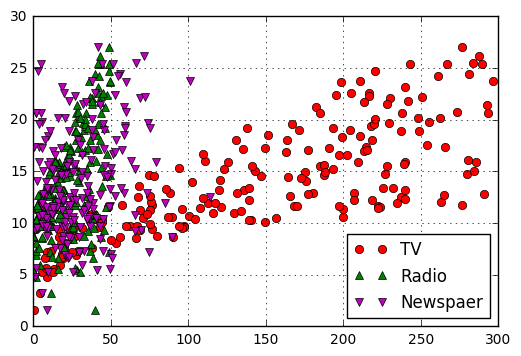

In [3]:
# Plot the x variables 
plt.plot(data['TV'], y, 'ro', label='TV')
plt.plot(data['Radio'], y, 'g^', label='Radio')
plt.plot(data['Newspaper'], y, 'mv', label='Newspaer')
plt.legend(loc='lower right')
plt.grid()
plt.show()

### Simple Linear Regression

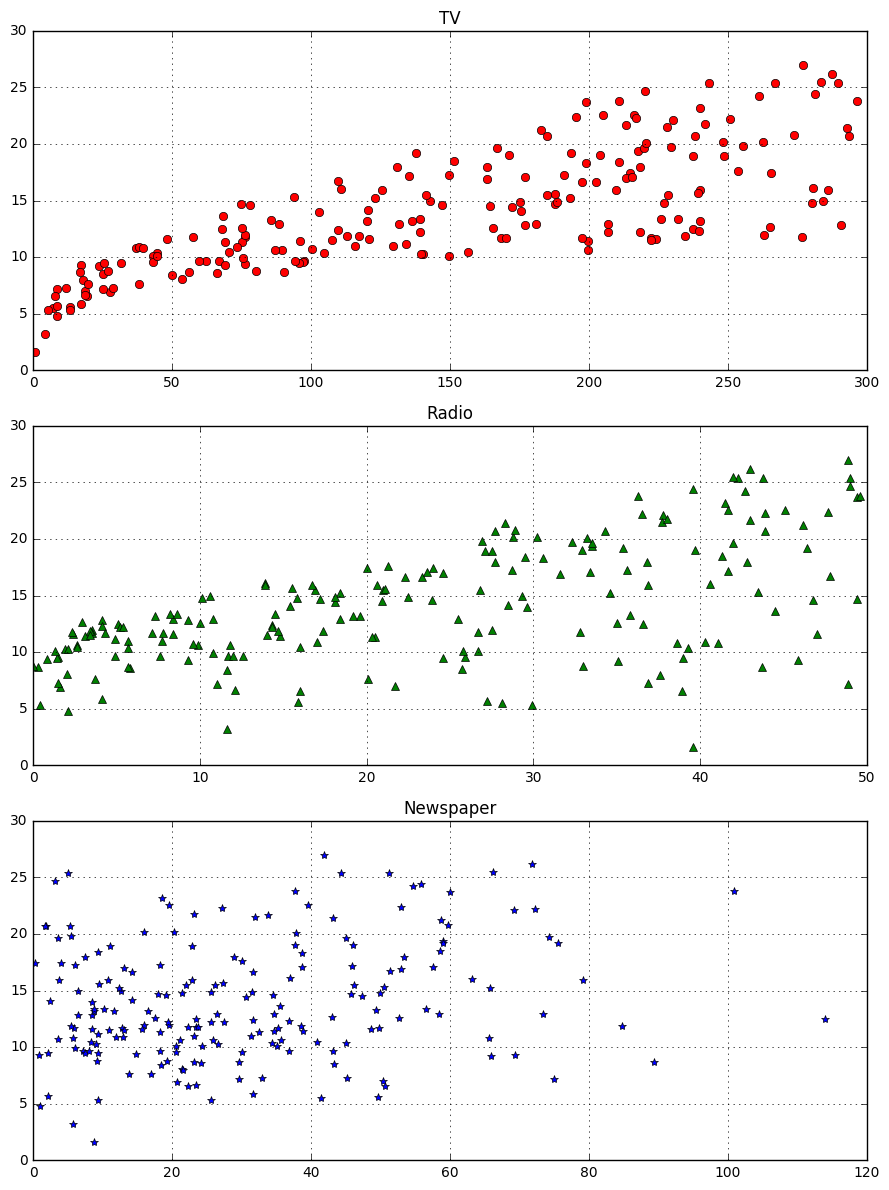

In [4]:
# Plot seperate plots
plt.figure(figsize=(9,12))
plt.subplot(311)
plt.plot(data['TV'], y, 'ro')
plt.title('TV')
plt.grid()
plt.subplot(312)
plt.plot(data['Radio'], y, 'g^')
plt.title('Radio')
plt.grid()
plt.subplot(313)
plt.plot(data['Newspaper'], y, 'b*')
plt.title('Newspaper')
plt.grid()
plt.tight_layout()
plt.show()


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
coefficients: [ 0.04656457  0.17915812  0.00345046]
intercept: 2.87696662232
mse, rmse 1.97304562023 1.40465142303


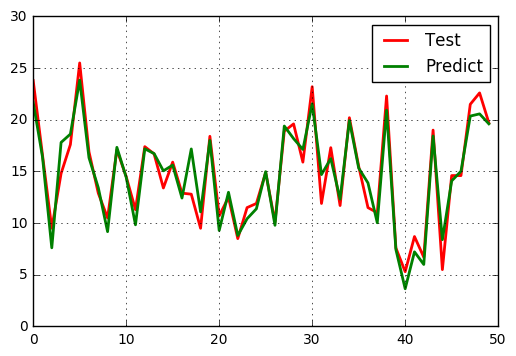

In [6]:

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 1)
# print x_train, y_train
linreg = LinearRegression()
model = linreg.fit(x_train, y_train)
print (model)
print ('coefficients:',linreg.coef_)
print ('intercept:',linreg.intercept_)

y_hat = linreg.predict(np.array(x_test))
mse = np.average((y_hat - np.array(y_test)) ** 2)  # Mean Squared Error
rmse = np.sqrt(mse)  # Root Mean Squared Error
print ('mse, rmse',mse, rmse)

t = np.arange(len(x_test))
plt.plot(t, y_test, 'r-', linewidth=2, label='Test')
plt.plot(t, y_hat, 'g-', linewidth=2, label='Predict')
plt.legend(loc='upper right')
plt.grid()
plt.show()

### Penalized Linear Regression with CV


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import GridSearchCV  # cross validation 

In [4]:
data = pd.read_csv('Data-and-Output/8.Advertising.csv')    # TV、Radio、Newspaper、Sales
x = data[['TV', 'Radio', 'Newspaper']]
# x = data[['TV', 'Radio']]
y = data['Sales']
print(x.head())
print(y.head())

      TV  Radio  Newspaper
0  230.1   37.8       69.2
1   44.5   39.3       45.1
2   17.2   45.9       69.3
3  151.5   41.3       58.5
4  180.8   10.8       58.4
0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Sales, dtype: float64


In [5]:
# Subset the data into two parts : train data and test data 
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1)
# print x_train, y_train
model = Lasso()
# model = Ridge()
alpha_can = np.logspace(-3, 2, 20)
lasso_model = GridSearchCV(model, param_grid={'alpha': alpha_can}, cv=5)
lasso_model.fit(x, y)
print ('Best Alpha：\n', lasso_model.best_params_)

Best Alpha：
 {'alpha': 1.4384498882876631}


1.87798885047 1.37039733306


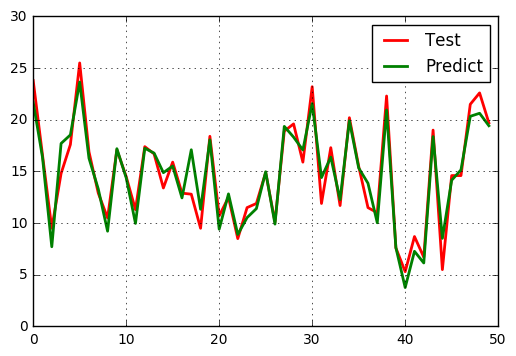

In [6]:
y_hat = lasso_model.predict(np.array(x_test))
mse = np.average((y_hat - np.array(y_test)) ** 2)  # Mean Squared Error
rmse = np.sqrt(mse)  # Root Mean Squared Error
print (mse, rmse)

# Plot the data the fitted points for test data 
t = np.arange(len(x_test))
plt.plot(t, y_test, 'r-', linewidth=2, label='Test')
plt.plot(t, y_hat, 'g-', linewidth=2, label='Predict')
plt.legend(loc='upper right')
plt.grid()
plt.show()

### Logistic Regression for Classification with Iris Data

In [7]:
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn import preprocessing
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Map the type 
def iris_type(s):
    it = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
    return it[s]

In [8]:
path = 'Data-and-Output/8.iris.data'
# data = np.loadtxt(path, dtype=float, delimiter=',', converters={4: iris_type})
df = pd.read_csv(path, header = 0)
x = df.values[:, :-1]
y = df.values[:, -1]
print ('x = \n', x[0:10,])
print ('y = \n', y[0:10])
le = preprocessing.LabelEncoder()
le.fit(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
print ('le class: \n',le.classes_)
y = le.transform(y)
print ('Lastest Version, y = \n', y)

x = 
 [[4.9 3.0 1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.0 3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.0 3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]]
y = 
 ['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa']
le class: 
 ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
Lastest Version, y = 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2]


In [9]:
x = x[:, :2]  # use the first two columns of x values 
print (x[0:10, ])
print (y[0:10])


[[4.9 3.0]
 [4.7 3.2]
 [4.6 3.1]
 [5.0 3.6]
 [5.4 3.9]
 [4.6 3.4]
 [5.0 3.4]
 [4.4 2.9]
 [4.9 3.1]
 [5.4 3.7]]
[0 0 0 0 0 0 0 0 0 0]


In [12]:
# Logistic regression 
x = StandardScaler().fit_transform(x)
lr = LogisticRegression()   # Logistic model 
lr.fit(x, y.ravel())        # Fit the model numpy.ravel Return a contiguous flattened array.



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [13]:
# Or equivalently, 
lr = Pipeline([('sc', StandardScaler()),
                    ('clf', LogisticRegression()) ])
lr.fit(x, y.ravel())

Pipeline(memory=None,
     steps=[('sc', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [14]:
# Plot
N, M = 500, 500     # how many sample points horizontally and vertically 
x1_min, x1_max = x[:, 0].min(), x[:, 0].max()   # range of the 0 col
x2_min, x2_max = x[:, 1].min(), x[:, 1].max()   # range of the 1 col
t1 = np.linspace(x1_min, x1_max, N)
t2 = np.linspace(x2_min, x2_max, M)
x1, x2 = np.meshgrid(t1, t2)                    # expand grid 
x_test = np.stack((x1.flat, x2.flat), axis=1)   # 
len(x_test)
print(x_test[0:10, ])

[[-1.87491588 -2.43265089]
 [-1.86617969 -2.43265089]
 [-1.85744349 -2.43265089]
 [-1.84870729 -2.43265089]
 [-1.8399711  -2.43265089]
 [-1.8312349  -2.43265089]
 [-1.8224987  -2.43265089]
 [-1.81376251 -2.43265089]
 [-1.80502631 -2.43265089]
 [-1.79629011 -2.43265089]]


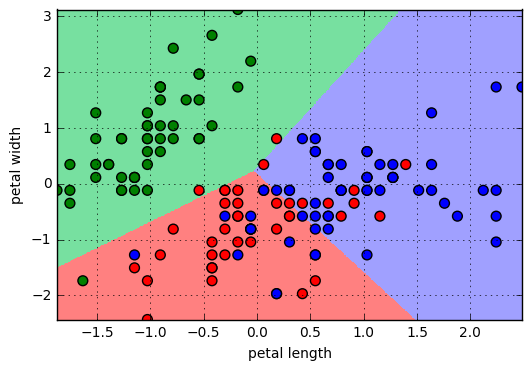

500
[[1 1 1 ..., 2 2 2]
 [1 1 1 ..., 2 2 2]
 [1 1 1 ..., 2 2 2]
 ..., 
 [0 0 0 ..., 2 2 2]
 [0 0 0 ..., 2 2 2]
 [0 0 0 ..., 2 2 2]]


In [21]:
cm_light = mpl.colors.ListedColormap(['#77E0A0', '#FF8080', '#A0A0FF'])
cm_dark = mpl.colors.ListedColormap(['g', 'r', 'b'])
y_hat = lr.predict(x_test)                  # estimated value 
y_hat = y_hat.reshape(x1.shape)                 # 
plt.pcolormesh(x1, x2, y_hat, cmap = cm_light)     # prediction on the sampled grid points 
plt.scatter(x[:, 0], x[:, 1], c=y, edgecolors='k', s=50, cmap=cm_dark)    # data 
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.grid()
plt.savefig('Data-and-Output/2.png')
plt.show()


In [20]:
# Check the accuracy 
y_hat = lr.predict(x)
y = y.reshape(-1)
result = y_hat == y
print (y_hat)
print (result)
acc = np.mean(result)
print ('Accuracy: %.2f%%' % (100 * acc))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 2 2 2 1 2 1 2 1 2 1 1 1 1 2 1 2 1 1 1 1 2 1 1 1 2
 2 2 2 1 1 1 1 1 1 0 0 2 1 1 1 1 2 1 1 1 1 1 2 1 1 2 1 2 2 2 2 1 2 2 2 2 2
 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 1 2 2 2 1 2 2
 1]
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True False  True  True  True  True  True  True  True
  True False False False  True False  True False  True False  True  True
  True  True False  True False  True  True  True  True False  True  True
  True False False False False  True  True  True  True  True  True False
 False False  True  True  True  True False  True  True  True  True  True
 False  True  True  True False  True  True  True  True False  True  True
  True  True  True  True False False  T

### Overfit

1阶，系数为： [-12.12113792   3.05477422]
0.895628068057 

2阶，系数为： [-3.23812184 -3.36390661  0.90493645]
0.990363261997 

3阶，系数为： [-3.90207326 -2.61163034  0.66422328  0.02290431]
0.99051094382 

4阶，系数为： [-8.20599769  4.20778207 -2.85304163  0.73902338 -0.05008557]
0.991053504177 

5阶，系数为： [ 21.59733285 -54.12232017  38.43116219 -12.68651476   1.98134176
  -0.11572371]
0.997386602996 

6阶，系数为： [ 14.73304785 -37.87317494  23.67462342  -6.07037979   0.42536833
   0.06803132  -0.00859246]
0.997398833576 

7阶，系数为： [ 314.3034462  -827.89446919  857.3329318  -465.46543635  144.2188385
  -25.67294678    2.44658612   -0.09675941]
0.999623815922 

8阶，系数为： [-1189.50147686  3643.69104909 -4647.92935485  3217.22810878 -1325.87382789
   334.32868689   -50.57119062     4.21251813    -0.148521  ]
1.0 

1阶，alpha=0.104762，系数为： [-11.25490373   2.85998183]
0.891378298001 

2阶，alpha=0.148497，系数为： [-2.89059872 -3.50263675  0.91813534]
0.99006721667 

3阶，alpha=0.058570，系数为： [-3.50359577 -2.84723549  0.69748401  0

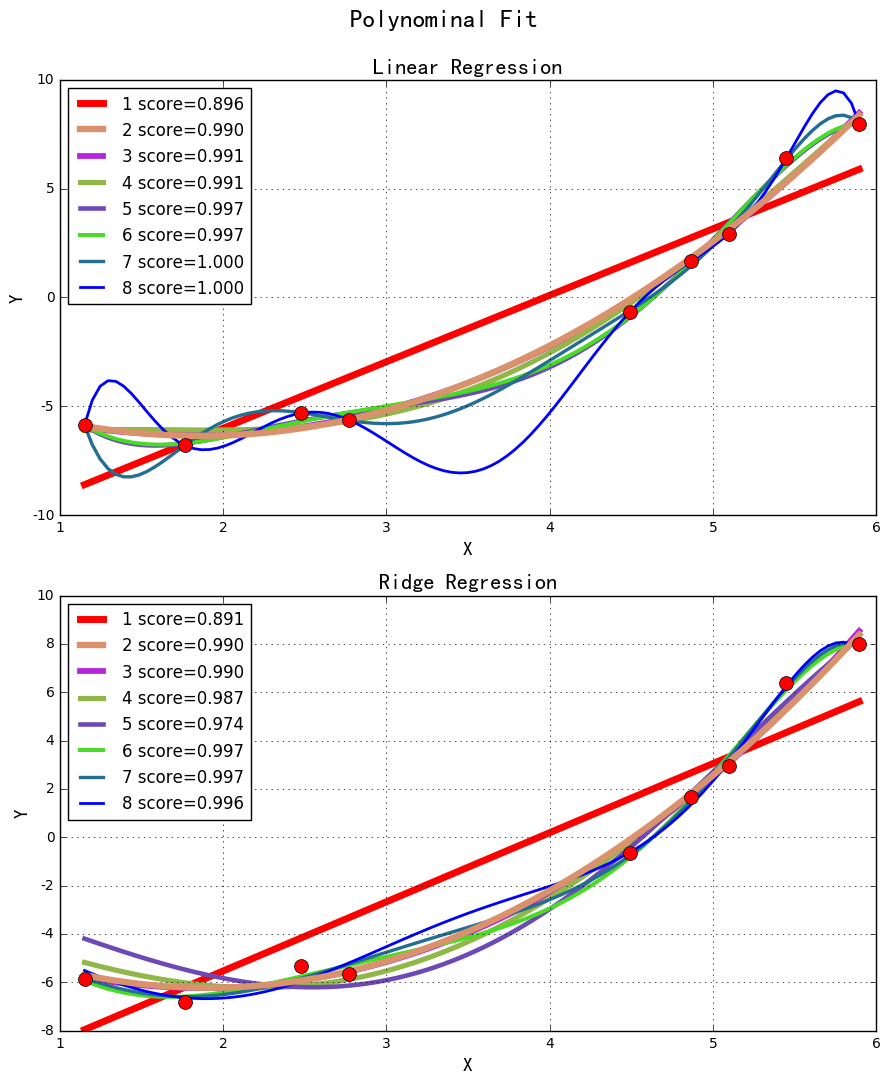

In [23]:
import numpy as np
from sklearn.linear_model import LinearRegression, RidgeCV
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
import matplotlib as mpl


if __name__ == "__main__":
    np.random.seed(0)
    N = 9
    x = np.linspace(0, 6, N) + np.random.randn(N)
    x = np.sort(x)
    y = x**2 - 4*x - 3 + np.random.randn(N)
    x.shape = -1, 1
    y.shape = -1, 1

    model_1 = Pipeline([
        ('poly', PolynomialFeatures()),
        ('linear', LinearRegression(fit_intercept=False))])  # linear
    model_2 = Pipeline([
        ('poly', PolynomialFeatures()),
        ('linear', RidgeCV(alphas=np.logspace(-3, 2, 100), fit_intercept=False))])  # ridge
    models = model_1, model_2
    mpl.rcParams['font.sans-serif'] = [u'simHei']
    mpl.rcParams['axes.unicode_minus'] = False
    np.set_printoptions(suppress=True)

    plt.figure(figsize=(9, 11), facecolor='w')
    d_pool = np.arange(1, N, 1)  # 阶
    m = d_pool.size
    clrs = []  # 颜色
    for c in np.linspace(16711680, 255, m).astype(np.int):
        clrs.append('#%06x' % c)
    line_width = np.linspace(5, 2, m)
    titles = u'Linear Regression', u'Ridge Regression'
    for t in range(2):
        model = models[t]
        plt.subplot(2, 1, t+1)
        plt.plot(x, y, 'ro', ms=10, zorder=N)
        for i, d in enumerate(d_pool):
            model.set_params(poly__degree=d)
            model.fit(x, y)
            lin = model.get_params('linear')['linear']
            if t == 0:
                print (u'%d阶，系数为：' % d, lin.coef_.ravel())
            else:
                print (u'%d阶，alpha=%.6f，系数为：' % (d, lin.alpha_), lin.coef_.ravel())
            x_hat = np.linspace(x.min(), x.max(), num=100)
            x_hat.shape = -1, 1
            y_hat = model.predict(x_hat)
            s = model.score(x, y)
            print (s, '\n')
            zorder = N - 1 if (d == 2) else 0
            plt.plot(x_hat, y_hat, color=clrs[i], lw=line_width[i], label=(u'%d score=%.3f' %(d, s)), zorder=zorder)
        plt.legend(loc='upper left')
        plt.grid(True)
        plt.title(titles[t], fontsize=16)
        plt.xlabel('X', fontsize=14)
        plt.ylabel('Y', fontsize=14)
    plt.tight_layout(1, rect=(0, 0, 1, 0.95))
    plt.suptitle(u'Polynominal Fit', fontsize=18)
    plt.show()


### Functions 

In [2]:
# Logistic regression 

# define the personalized h function for the model
def logistic_regression(data, alpha, lamda):
    n = len(data[0]) - 1
    w = [0 for x in range(n)]
    w2 = [0 for x in range(n)]
    for times in range(10000):
        for d in data:
            for i in range(n):
                w2[i] = w[i] + alpha * (d[n] - h(w, d)) * d[i] + lamda * w[i]
            for i in range(n):
                w[i] = w2[i]
            print(w)
    return(w)


# Softmax regression 
# define the personalized predict function for the model 
def soft_max(data, K, alpha, lamda):
    n = len(data[0]) - 1 # dimension of sample 
    w = np.zeros((K, n))  # initialize weights 
    wNew = np.zeros((K, n)) # temp weights in iteration
    for times in range(1000):
        for d in data:
            x = d[: -1]  # exclude y values 
            for k in range(K):
                y = 0
                if int(d[-1] + 0.5) == k:
                    y = 1
                p = predict(w, x, k)
                g = (y - p) * x  # gradient
                wNew[k] = w[k] + (alpha * g + lamda * w[k])
            w = wNew.copy()
    return(w)
    